In [1]:
# Setup e carregamento dos dados
# Imports essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset limpo
df = pd.read_csv('../data/ifood_data_limpo.csv')

# Verificando as 5 primeiras linhas
df.head()

,availableForScheduling,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags
0,False,marmita,3.99,27,1.22,5300108,10.0,cantina arte & sabor,[],cheapest,0.0,['address_preform_type $$ cart::mcht::100_deli...
1,False,açaí,7.99,61,4.96,5300108,10.0,raruty açaí raiz,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...
2,False,bebidas,11.99,70,8.35,5300108,5.0,toma na kombi,[],moderate,0.0,['address_preform_type $$ cpgn_user_discount_6...
3,False,carnes,16.49,63,6.35,5300108,20.0,churrasquinho do barriga´s,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...
4,False,brasileira,11.99,58,5.22,5300108,20.0,prime restaurante,[],cheapest,0.0,['address_preform_type $$ guided_help_type $$ ...


In [2]:
# Estatísticas descritivas gerais
print(df.describe())

        delivery_fee  delivery_time       distance          ibge  \
count  392879.000000  392879.000000  392879.000000  3.928790e+05   
mean        6.785738      46.495776       3.304103  3.439991e+06   
std         4.249458      15.556741       1.909015  7.515853e+05   
min         0.000000      -1.000000       0.000000  1.100023e+06   
25%         4.000000      35.000000       1.730000  3.140001e+06   
50%         6.000000      45.000000       3.050000  3.516309e+06   
75%         9.490000      60.000000       4.760000  3.550308e+06   
max        30.000000      97.000000       9.410000  5.300108e+06   

       minimumOrderValue         rating  
count      392879.000000  392879.000000  
mean           14.223273       2.509955  
std             7.480974       2.288486  
min             0.000000       0.000000  
25%            10.000000       0.000000  
50%            15.000000       3.925530  
75%            20.000000       4.718750  
max            35.000000       5.000000  


In [3]:
# Contagem das 10 categorias mais comuns
print(df['category'].value_counts().head(10))

category
lanches          96979
brasileira       71824
doces & bolos    38770
pizza            34504
açaí             21849
marmita          16349
bebidas          12618
japonesa         12451
saudável          9535
salgados          9433
Name: count, dtype: int64


In [4]:
# Média do tempo de entrega por categoria (ordenado decrescente)
df.groupby('category')['delivery_time'].mean().sort_values(ascending=False).head(10)

category
panqueca         50.641379
mercado          49.925830
japonesa         49.535298
pizza            49.094569
frangos          48.467140
lanches          48.458831
xis              48.364865
hambúrguer       47.902563
variada          47.772750
frutos do mar    47.622964
Name: delivery_time, dtype: float64

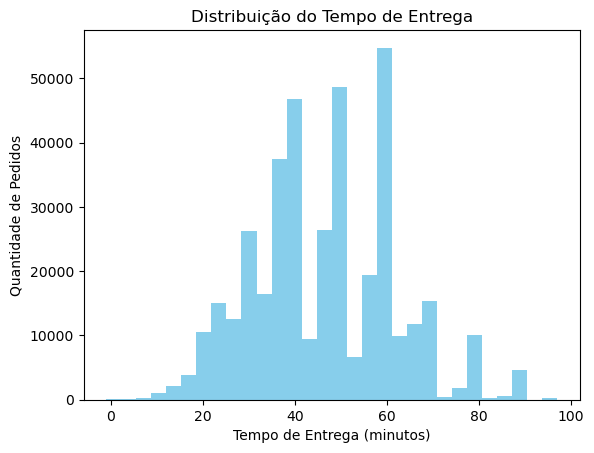

In [5]:
# Histograma do tempo de entrega
plt.hist(df['delivery_time'], bins=30, color='skyblue')
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (minutos)')
plt.ylabel('Quantidade de Pedidos')
plt.show()

category
panqueca         50.641379
mercado          49.925830
japonesa         49.535298
pizza            49.094569
frangos          48.467140
lanches          48.458831
xis              48.364865
hambúrguer       47.902563
variada          47.772750
frutos do mar    47.622964
Name: delivery_time, dtype: float64


C:\Users\leole\AppData\Local\Temp\ipykernel_18136\3112512332.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


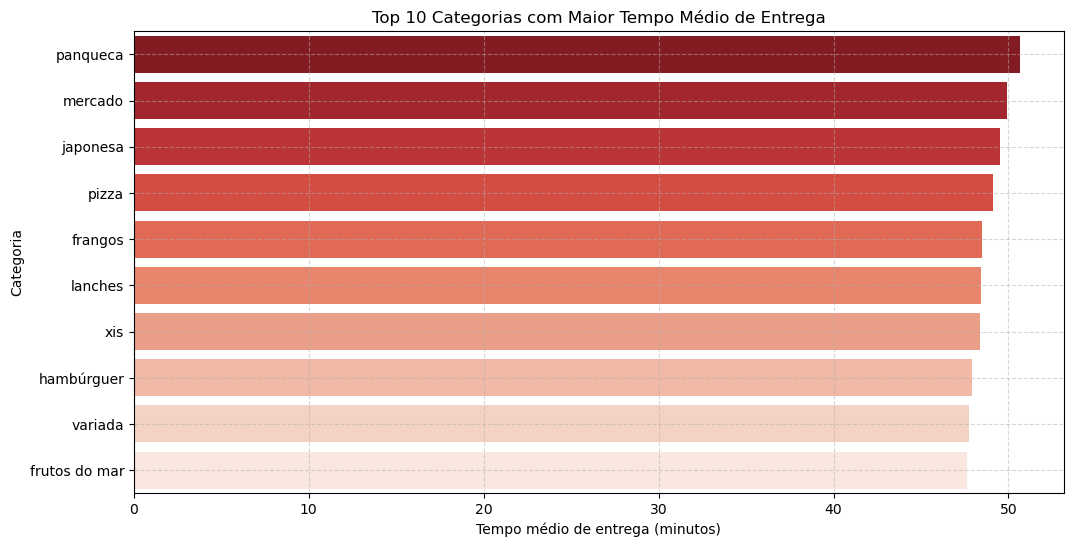

In [6]:
# Agrupar por categoria e calcular a média do tempo de entrega
media_entrega_por_categoria = df.groupby('category')['delivery_time'].mean()

# Ordenar em ordem decrescente para ver quem demora mais
media_entrega_ordenada = media_entrega_por_categoria.sort_values(ascending=False)

# Exibir as 10 categorias que mais demoram
print(media_entrega_ordenada.head(10))

# Plotando o resultado
plt.figure(figsize=(12,6))
sns.barplot(
    x=media_entrega_ordenada.head(10).values,
    y=media_entrega_ordenada.head(10).index,
    palette='Reds_r'
)
plt.title('Top 10 Categorias com Maior Tempo Médio de Entrega')
plt.xlabel('Tempo médio de entrega (minutos)')
plt.ylabel('Categoria')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\leole\AppData\Local\Temp\ipykernel_18136\779324084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')


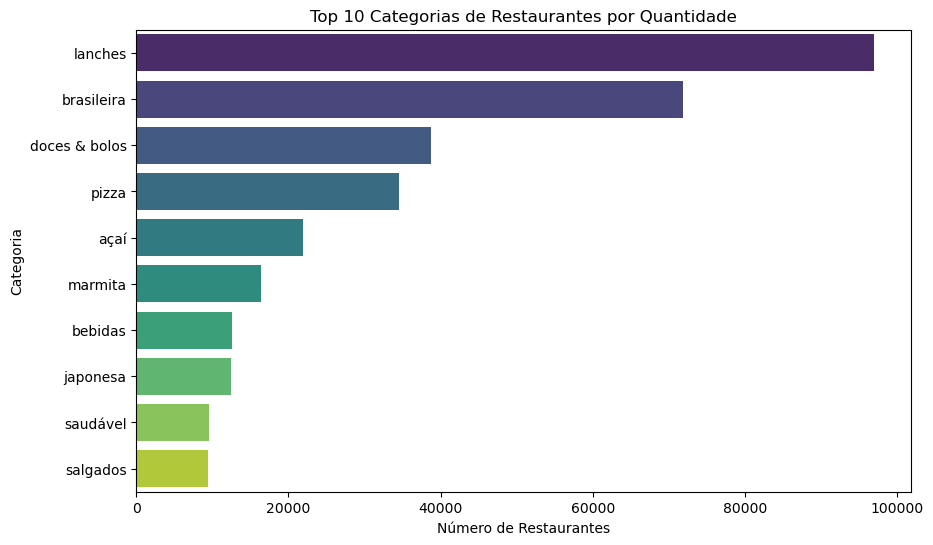

In [7]:
# Contar categorias
top_categorias = df['category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='viridis')
plt.title('Top 10 Categorias de Restaurantes por Quantidade')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Categoria')
plt.show()

In [8]:
# Seleciona apenas as categorias mais populares
top_categorias = ['lanches', 'brasileira', 'doces & bolos']

# Agrupa e calcula métricas
resumo = (
    df[df['category'].isin(top_categorias)]
    .groupby('category')
    .agg({
        'delivery_time': 'mean',
        'delivery_fee': 'mean',
        'rating': 'mean',
        'name': 'count'
    })
    .rename(columns={'name': 'quantidade_estabelecimentos'})
    .sort_values(by='quantidade_estabelecimentos', ascending=False)
)

print(resumo)

               delivery_time  delivery_fee    rating  \
category                                               
lanches            48.458831      6.337658  2.455193   
brasileira         45.866980      6.667453  2.215803   
doces & bolos      44.800000      7.821402  2.199505   

               quantidade_estabelecimentos  
category                                    
lanches                              96979  
brasileira                           71824  
doces & bolos                        38770  


In [9]:
participacao = (
    df['category']
    .value_counts(normalize=True)
    .loc[top_categorias] * 100
).round(2)

print(participacao)

#Insight:
#As categorias lanches, brasileira e doces & bolos representam as mais populares entre os consumidores, concentrando aproximadamente 52,83% dos estabelecimentos.
#Enquanto lanches se destacam pela maior quantidade e tempo médio de entrega mais rápido, doces & bolos tendem a 
#apresentar notas mais baixas e taxas médias ligeiramente mais altas — possivelmente por serem mais nichados.

category
lanches          24.68
brasileira       18.28
doces & bolos     9.87
Name: proportion, dtype: float64


C:\Users\leole\AppData\Local\Temp\ipykernel_18136\627235777.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='Tempo de Entrega (min)', ax=axes[0], palette='Blues_d')
C:\Users\leole\AppData\Local\Temp\ipykernel_18136\627235777.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='Taxa de Entrega (R$)', ax=axes[1], palette='Oranges_d')
C:\Users\leole\AppData\Local\Temp\ipykernel_18136\627235777.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Categoria', y='

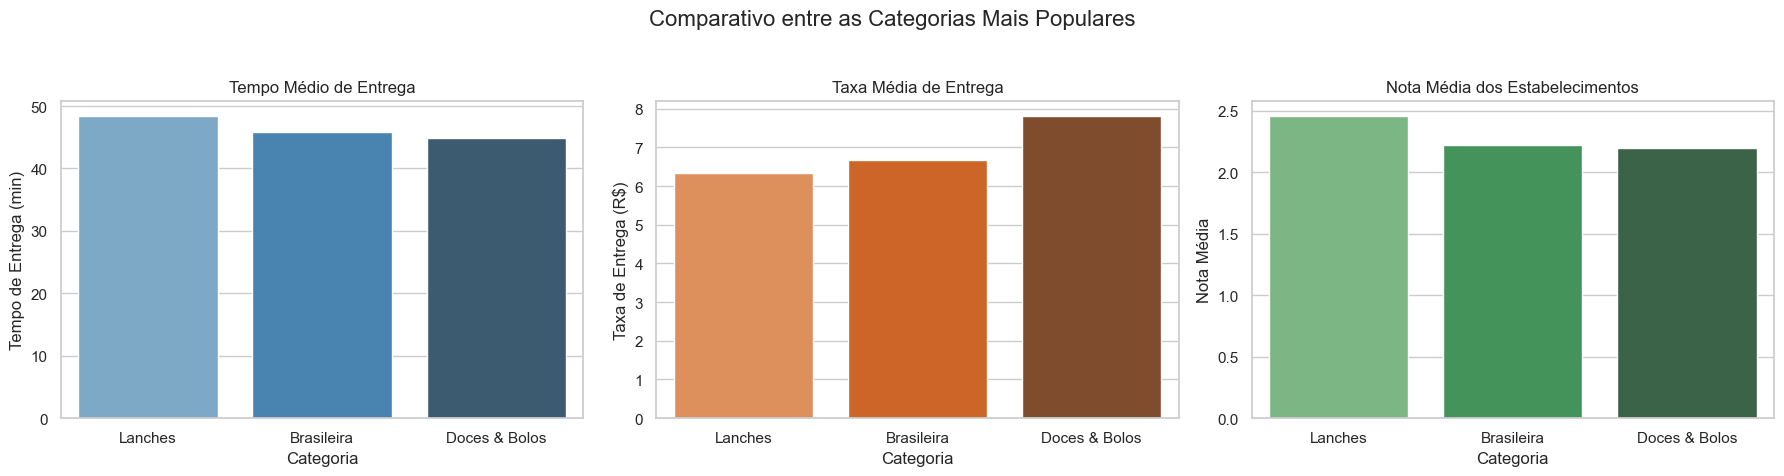

In [10]:
# Dados resumidos
data = {
    'Categoria': ['Lanches', 'Brasileira', 'Doces & Bolos'],
    'Tempo de Entrega (min)': [48.46, 45.87, 44.8],
    'Taxa de Entrega (R$)': [6.34, 6.67, 7.82],
    'Nota Média': [2.46, 2.22, 2.20]
}

df_plot = pd.DataFrame(data)

# Configurações do estilo
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tempo de entrega
sns.barplot(data=df_plot, x='Categoria', y='Tempo de Entrega (min)', ax=axes[0], palette='Blues_d')
axes[0].set_title('Tempo Médio de Entrega')

# Taxa de entrega
sns.barplot(data=df_plot, x='Categoria', y='Taxa de Entrega (R$)', ax=axes[1], palette='Oranges_d')
axes[1].set_title('Taxa Média de Entrega')

# Nota média
sns.barplot(data=df_plot, x='Categoria', y='Nota Média', ax=axes[2], palette='Greens_d')
axes[2].set_title('Nota Média dos Estabelecimentos')

# Mostrar os gráficos
plt.suptitle('Comparativo entre as Categorias Mais Populares', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

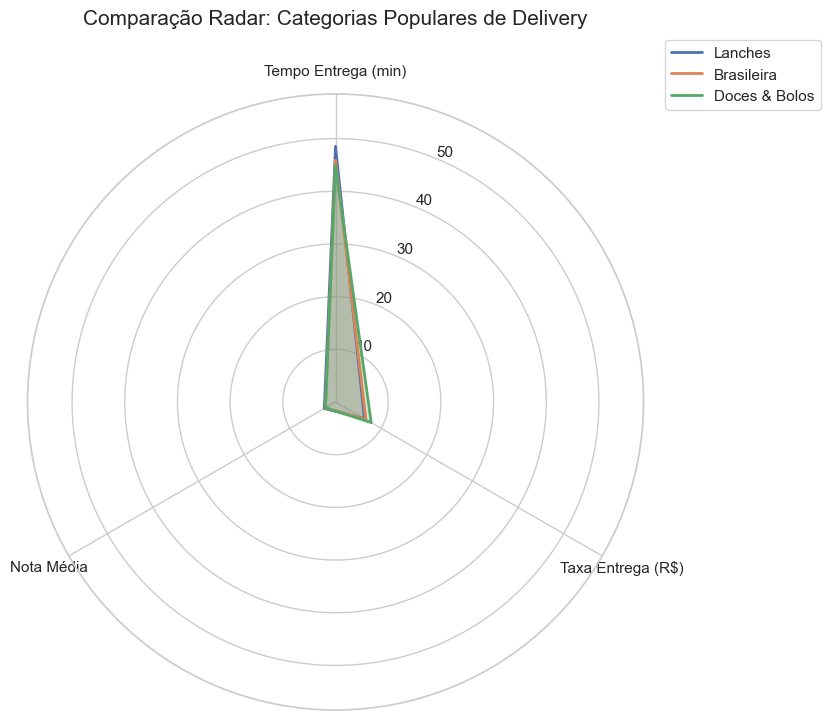

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
labels = ['Tempo Entrega (min)', 'Taxa Entrega (R$)', 'Nota Média']
categories = ['Lanches', 'Brasileira', 'Doces & Bolos']

# Valores para cada categoria na ordem dos labels
values = {
    'Lanches': [48.46, 6.34, 2.46],
    'Brasileira': [45.87, 6.67, 2.22],
    'Doces & Bolos': [44.80, 7.82, 2.20]
}

# Número de variáveis
num_vars = len(labels)

# Ângulos para os eixos do radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico unindo o último ponto ao primeiro
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for cat in categories:
    vals = values[cat]
    vals += vals[:1]  # fechar o círculo
    ax.plot(angles, vals, label=cat, linewidth=2)
    ax.fill(angles, vals, alpha=0.25)

# Configurações dos eixos
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Limites - ajustando para escala visual (melhorar visualização)
ax.set_ylim(0, max(max(vals) for vals in values.values()) + 10)

# Título e legenda
plt.title('Comparação Radar: Categorias Populares de Delivery', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [13]:
df['tags'].sample(5).values

array(["['address_preform_type $$ bomebarato_cupom $$ cpgn_user_discount_6_list $$ guided_help_type $$ hamburguer_taxa_gratis $$ jetski_burger_20ago $$ jetski_burger_ago20 $$ novo $$ novo_bom_barato_jun20 $$ ranking_fastfoods_fev21 $$ restaurante voucher5 guarana']",
       "['address_preform_type $$ exclusivo $$ guided_help_type $$ long_tail $$ mesdodoce_fidelidade_dez20  $$ pratos_vegetarianos_fev21']",
       "['address_preform_type $$ guided_help_type $$ hamburguer_taxa_gratis $$ novo $$ ranking_fastfoods_fev21 $$ new']",
       "['address_preform_type $$ crm_20200109_togo_tag $$ exclusivo $$ guided_help_type $$ hamburguer_taxa_gratis $$ jetski_burger_20ago $$ jetski_burger_ago20 $$ long_tail $$ maisrapidos_entregagratis_dez20 $$ pagamento_dinheiro_set19 $$ ranking_fastfoods_fev21']",
       "['address_preform_type $$ cpgn_user_discount_br_list $$ guided_help_type $$ mesdodoce_fidelidade_dez20  $$ novo']"],
      dtype=object)

In [14]:
import re

def extrair_mes_ano(tags):
    match = re.findall(r'(jan|fev|mar|abr|mai|jun|jul|ago|set|out|nov|dez)(\d{2})', tags)
    return f'{match[0][0]}/20{match[0][1]}' if match else None

df['mes_tag'] = df['tags'].astype(str).apply(extrair_mes_ano)

<Axes: xlabel='mes_tag'>

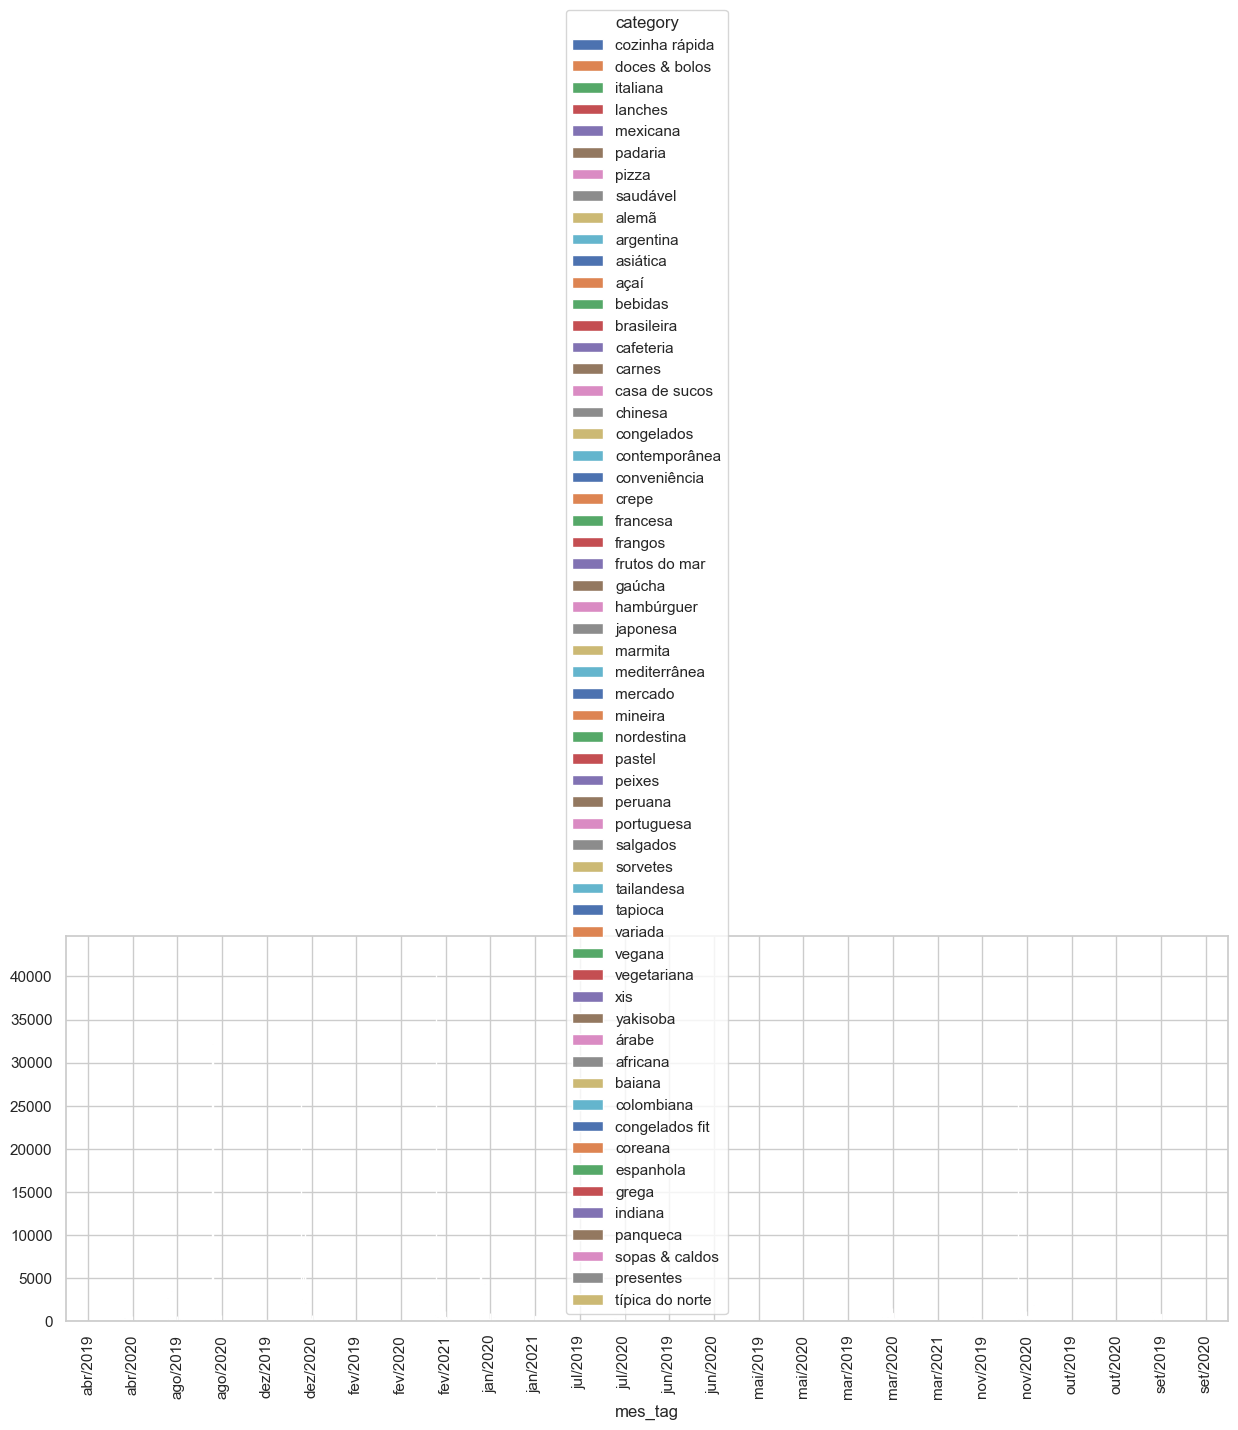

In [15]:
df.groupby(['mes_tag', 'category']).size().unstack().plot(kind='bar', figsize=(15,5))

In [16]:
import re

def extrair_mes_ano(tags):
    # Extrai o primeiro padrão tipo "dez20", "ago20", etc.
    match = re.findall(r'(jan|fev|mar|abr|mai|jun|jul|ago|set|out|nov|dez)(\d{2})', tags.lower())
    return f'{match[0][0]}/20{match[0][1]}' if match else None

# Aplica a função
df['mes_tag'] = df['tags'].astype(str).apply(extrair_mes_ano)

In [17]:
df['mes_tag'].value_counts(dropna=False).head(10)

mes_tag
None        99153
dez/2020    67874
fev/2021    56258
nov/2020    39982
ago/2020    35460
jan/2020    18276
mar/2020    16995
ago/2019    14805
jul/2020    14378
set/2019    11096
Name: count, dtype: int64

C:\Users\leole\AppData\Local\Temp\ipykernel_18136\2514786556.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


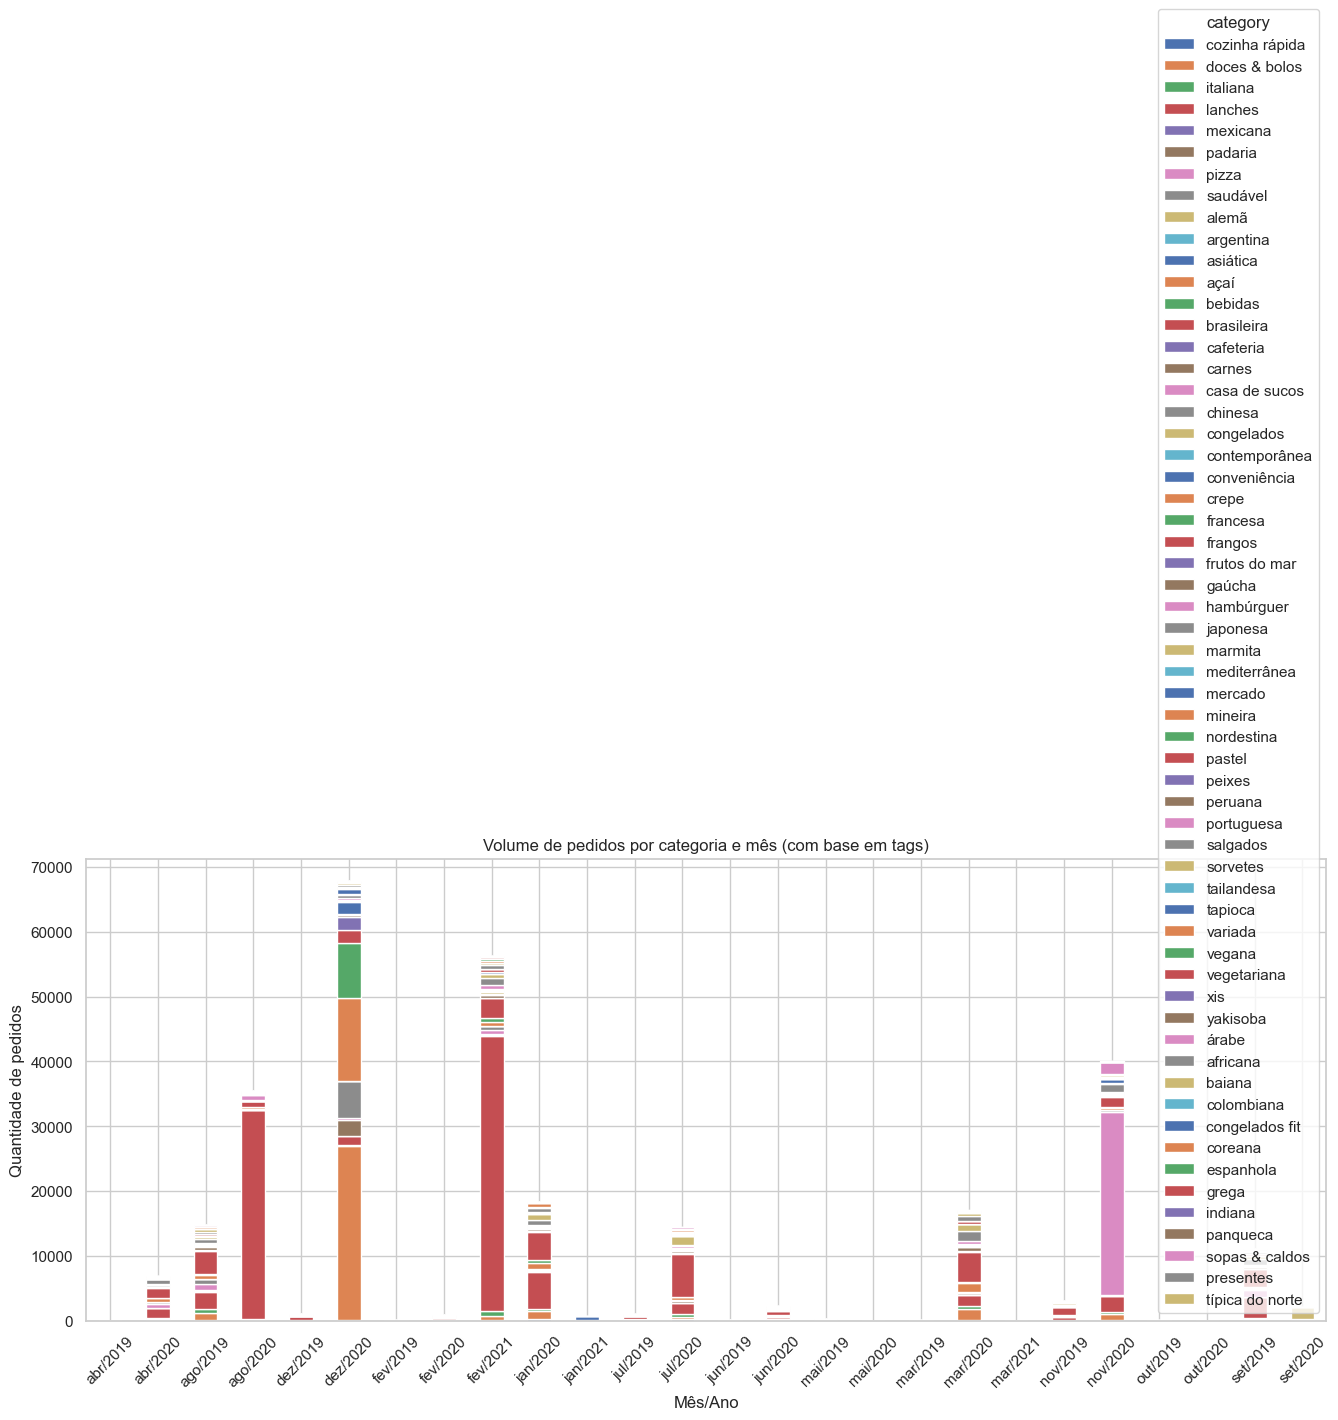

In [18]:
import matplotlib.pyplot as plt

# Agrupar por mês e categoria
grupo = df.groupby(['mes_tag', 'category']).size().unstack().fillna(0)

# Visualizar
grupo.plot(kind='bar', stacked=True, figsize=(16,6))
plt.title('Volume de pedidos por categoria e mês (com base em tags)')
plt.ylabel('Quantidade de pedidos')
plt.xlabel('Mês/Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

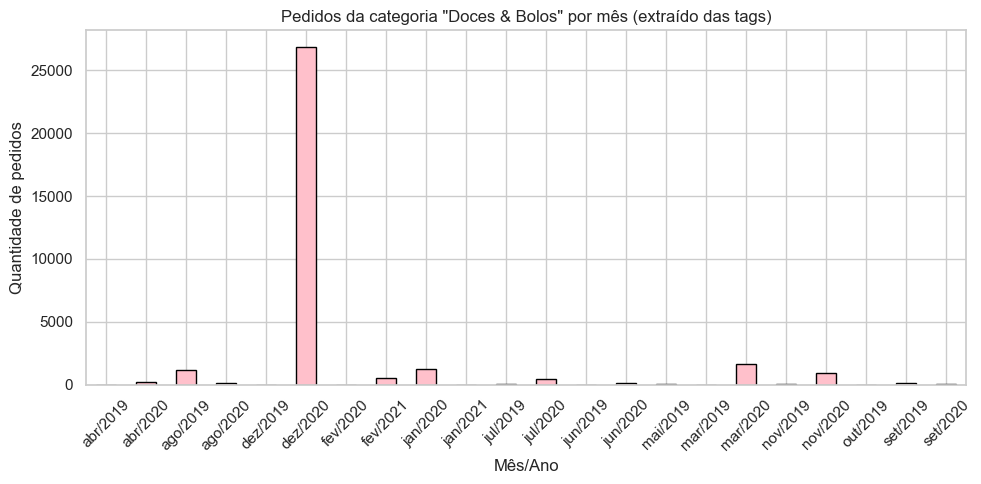

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Função para extrair mês/ano das tags
def extrair_mes_ano(tags):
    match = re.findall(r'(jan|fev|mar|abr|mai|jun|jul|ago|set|out|nov|dez)(\d{2})', tags.lower())
    return f'{match[0][0]}/20{match[0][1]}' if match else None

# Aplicar função na coluna de tags
df['mes_tag'] = df['tags'].astype(str).apply(extrair_mes_ano)

# Filtrar apenas "doces & bolos"
doces = df[df['category'] == 'doces & bolos']

# Contar por mês
doces_mes = doces['mes_tag'].value_counts().sort_index()

# Plotar
plt.figure(figsize=(10,5))
doces_mes.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Pedidos da categoria "Doces & Bolos" por mês (extraído das tags)')
plt.ylabel('Quantidade de pedidos')
plt.xlabel('Mês/Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
print(df.columns)

Index(['availableForScheduling', 'category', 'delivery_fee', 'delivery_time',
       'distance', 'ibge', 'minimumOrderValue', 'name', 'paymentCodes',
       'price_range', 'rating', 'tags', 'mes_tag'],
      dtype='object')


In [22]:
df['mes_tag'].unique()

array([None, 'dez/2020', 'fev/2021', 'ago/2020', 'nov/2020', 'jul/2020',
       'jan/2020', 'mar/2020', 'jun/2020', 'set/2019', 'set/2020',
       'abr/2020', 'ago/2019', 'nov/2019', 'fev/2020', 'jul/2019',
       'fev/2019', 'jun/2019', 'jan/2021', 'mai/2019', 'dez/2019',
       'mar/2019', 'abr/2019', 'out/2019', 'out/2020', 'mar/2021',
       'mai/2020'], dtype=object)

In [23]:
import pandas as pd

# Remove valores nulos
df = df[df['mes_tag'].notna()].copy()

# Converte para datetime
df['month_year'] = pd.to_datetime(df['mes_tag'], format='%b/%Y', errors='coerce')

<Figure size 1200x600 with 0 Axes>

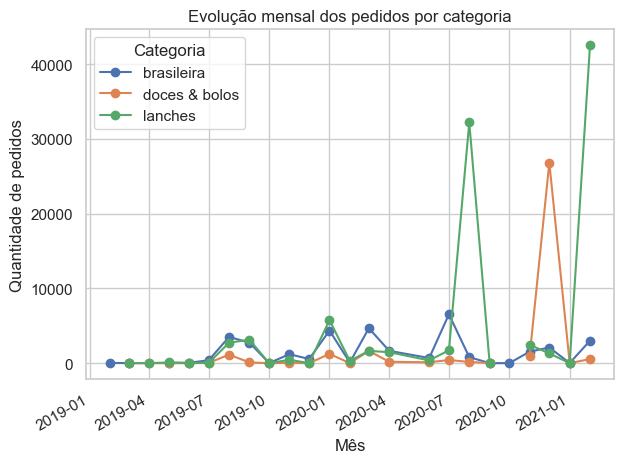

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Cópia do DataFrame e limpeza
df = df[df['mes_tag'].notna()].copy()

# Mapeamento de meses em português para números
meses_pt = {
    'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04',
    'mai': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'set': '09', 'out': '10', 'nov': '11', 'dez': '12'
}

# Quebra 'mes_tag' e converte para datetime
def traduz_mes(mes_ano):
    mes, ano = mes_ano.split('/')
    return f'{ano}-{meses_pt[mes.lower()]}'

df['month_year'] = df['mes_tag'].apply(traduz_mes)
df['month_year'] = pd.to_datetime(df['month_year'])

# Filtra as categorias
top_cats = ['doces & bolos', 'lanches', 'brasileira']
df_top = df[df['category'].isin(top_cats)]

# Agrupa e plota
monthly_counts = df_top.groupby(['month_year', 'category']).size().unstack()

plt.figure(figsize=(12, 6))
monthly_counts.plot(marker='o')
plt.title('Evolução mensal dos pedidos por categoria')
plt.xlabel('Mês')
plt.ylabel('Quantidade de pedidos')
plt.grid(True)
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd

# Exemplo de coluna mes_tag
df['mes_tag'].unique()

# Função para converter 'dez/2020' em datetime
def convert_mes_tag_to_date(mes_tag):
    if pd.isna(mes_tag):
        return pd.NaT
    try:
        return pd.to_datetime(mes_tag, format='%b/%Y')  # %b = nome curto do mês em inglês
    except:
        # se seu mes_tag está em português, converta antes:
        meses_pt = {
            'jan': 'jan', 'fev': 'feb', 'mar': 'mar', 'abr': 'apr', 'mai': 'may',
            'jun': 'jun', 'jul': 'jul', 'ago': 'aug', 'set': 'sep', 'out': 'oct',
            'nov': 'nov', 'dez': 'dec'
        }
        for pt, en in meses_pt.items():
            if mes_tag.lower().startswith(pt):
                mes_tag_en = mes_tag.lower().replace(pt, en)
                return pd.to_datetime(mes_tag_en, format='%b/%Y')
        return pd.NaT

# Aplicar função
df['date'] = df['mes_tag'].apply(convert_mes_tag_to_date)

# Extrair ano e mês (numéricos)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Dia da semana e hora só se tiver coluna de data completa, se não pula

# Visualizar resultado
print(df[['mes_tag', 'date', 'year', 'month']].head())


    mes_tag       date  year  month
1  dez/2020 2020-12-01  2020     12
2  dez/2020 2020-12-01  2020     12
3  fev/2021 2021-02-01  2021      2
5  ago/2020 2020-08-01  2020      8
6  fev/2021 2021-02-01  2021      2


In [28]:
import pandas as pd
import numpy as np

# Exemplo assumindo que você já tem a coluna 'date' em datetime

# Criar colunas dia da semana e fim de semana
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Exemplo: lista de feriados (adaptar conforme seu período e local)
feriados = [
    '2020-12-25',  # Natal
    '2020-11-15',  # Proclamação da República
    '2021-01-01',  # Ano Novo
    # adicionar mais feriados conforme necessário
]
feriados = pd.to_datetime(feriados)
df['is_holiday'] = df['date'].isin(feriados)

# Agora, resumo comparando volumes e médias em fins de semana, feriados e dias úteis
summary = df.groupby(['category', 'is_weekend', 'is_holiday']).agg(
    pedidos=('category', 'count'),
    tempo_medio_entrega=('delivery_time', 'mean'),
    avaliacao_media=('rating', 'mean')
).reset_index()

print(summary)


      category  is_weekend  is_holiday  pedidos  tempo_medio_entrega  \
0     africana       False       False       26            44.961538   
1     africana        True       False        4            41.000000   
2        alemã       False       False       75            40.493333   
3        alemã        True       False       27            44.555556   
4    argentina       False       False      100            41.030000   
..         ...         ...         ...      ...                  ...   
134        xis        True       False       15            42.600000   
135   yakisoba       False       False       59            47.508475   
136   yakisoba        True       False       23            44.695652   
137      árabe       False       False      499            42.416834   
138      árabe        True       False     2003            46.903645   

     avaliacao_media  
0           2.276122  
1           1.171875  
2           3.267823  
3           3.480857  
4           2.755782

In [ ]:
!pip install holidays
import holidays  # biblioteca para feriados

# Certifica que sua coluna de data está no tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Cria uma lista de feriados no Brasil (ou no seu estado, ajuste se quiser)
br_holidays = holidays.Brazil()

# Cria a coluna booleana
df['is_holiday_or_weekend'] = df['date'].apply(lambda x: x in br_holidays or x.weekday() >= 5)

C:\Users\leole\AppData\Local\Temp\ipykernel_18136\1615478470.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(br_holidays)


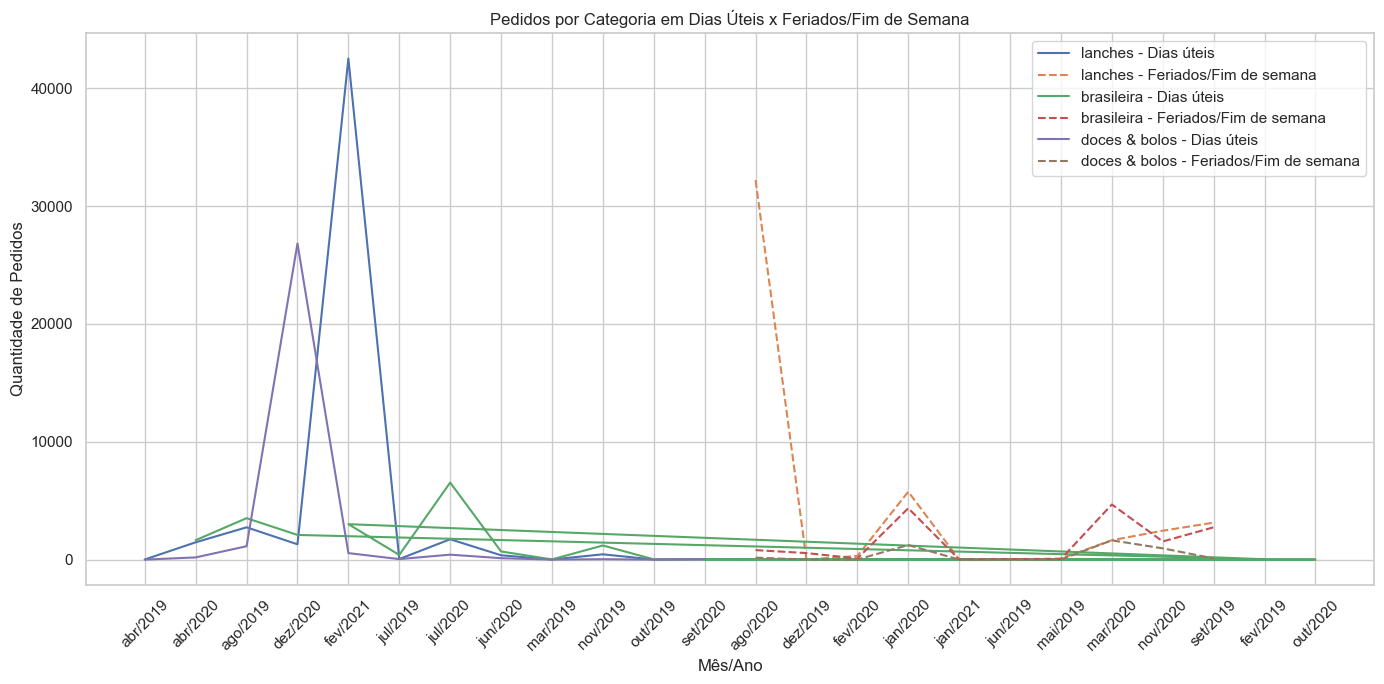

In [34]:
import pandas as pd
import holidays
import matplotlib.pyplot as plt

# Exemplo: df já tem a coluna 'date' no formato datetime e 'category'

# 1. Definir feriados do Brasil no período dos dados
br_holidays = holidays.Brazil(years=df['date'].dt.year.unique())

# 2. Criar coluna booleana para feriado
df['is_holiday'] = df['date'].isin(br_holidays)

# 3. Criar coluna booleana para fim de semana (sábado=5, domingo=6)
df['is_weekend'] = df['date'].dt.weekday >= 5

# 4. Criar coluna combinada que marca feriado ou fim de semana
df['is_holiday_or_weekend'] = df['is_holiday'] | df['is_weekend']

# 5. Selecionar as 3 categorias principais que você tinha (exemplo)
top_categories = ['lanches', 'brasileira', 'doces & bolos']
df_filtered = df[df['category'].isin(top_categories)]

# 6. Agrupar por mês, categoria e feriado/fim de semana e contar pedidos
df_grouped = df_filtered.groupby(['mes_tag', 'category', 'is_holiday_or_weekend']).size().reset_index(name='pedido_count')

# 7. Gerar o gráfico comparativo
plt.figure(figsize=(14,7))
for cat in top_categories:
    data_weekday = df_grouped[(df_grouped['category'] == cat) & (df_grouped['is_holiday_or_weekend'] == False)]
    data_holiday = df_grouped[(df_grouped['category'] == cat) & (df_grouped['is_holiday_or_weekend'] == True)]
    plt.plot(data_weekday['mes_tag'], data_weekday['pedido_count'], label=f'{cat} - Dias úteis')
    plt.plot(data_holiday['mes_tag'], data_holiday['pedido_count'], label=f'{cat} - Feriados/Fim de semana', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por Categoria em Dias Úteis x Feriados/Fim de Semana')
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
# Seleciona as features que vão ajudar a prever
features = ['distance', 'price_range', 'rating']  # Ajuste conforme seu dataset

X = df[features]
y = df['delivery_time']

In [38]:
X = pd.get_dummies(X, columns=['price_range'], drop_first=True)

In [39]:
X = X.fillna(X.median())
y = y.fillna(y.median())

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 11.40
RMSE: 14.88


C:\Users\leole\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


distance                      0.560810
rating                        0.367599
price_range_cheapest          0.024753
price_range_moderate          0.023331
price_range_expensive         0.014153
price_range_most_expensive    0.009353
dtype: float64


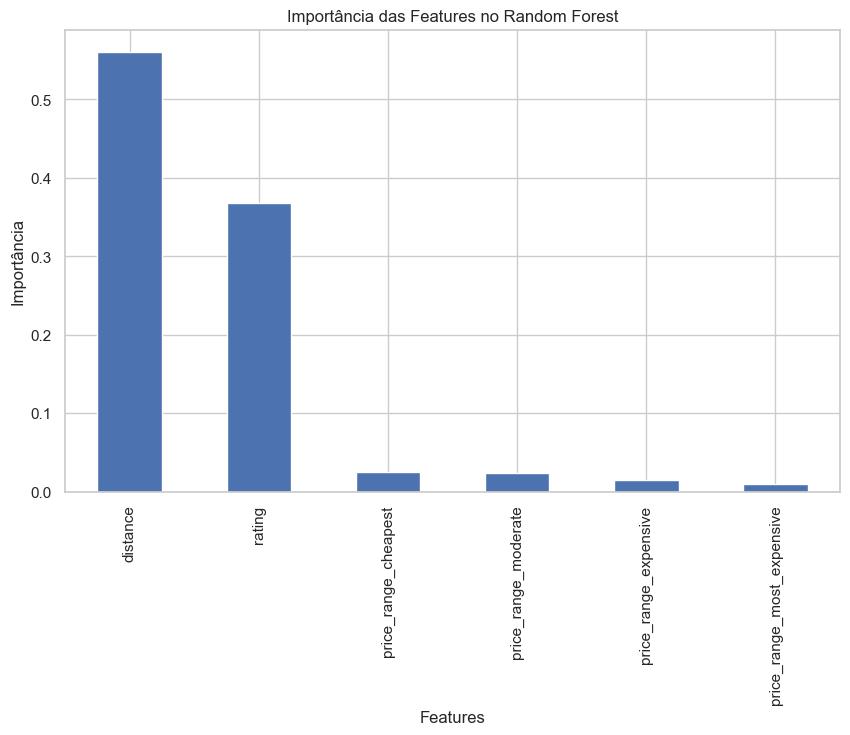

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Pega a importância das features do modelo
importances = model.feature_importances_

# Cria um DataFrame para facilitar a visualização
feat_importances = pd.Series(importances, index=X_train.columns)

# Ordena do mais importante para o menos importante
feat_importances = feat_importances.sort_values(ascending=False)

# Mostra as importâncias
print(feat_importances)

# Plota um gráfico de barras
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title('Importância das Features no Random Forest')
plt.ylabel('Importância')
plt.xlabel('Features')
plt.show()


In [45]:
df = pd.get_dummies(df, columns=['price_range'], prefix='price_range')

In [46]:
# Atualiza os nomes das features usadas
features = ['distance', 'rating', 'price_range_cheapest', 
            'price_range_moderate', 'price_range_expensive', 
            'price_range_most_expensive']

X = df[features].copy()

# Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

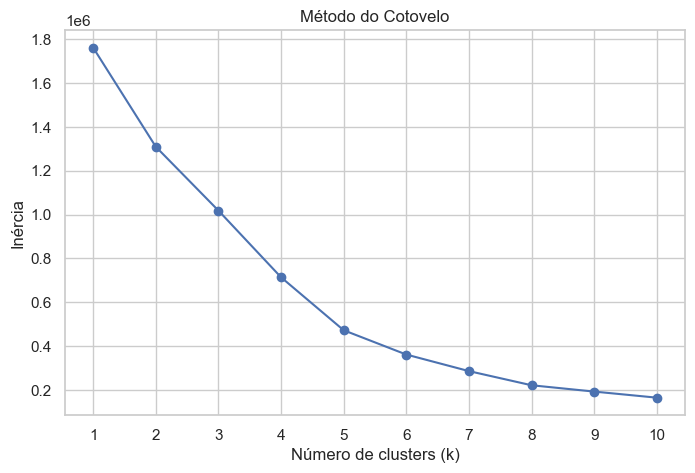

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testa diferentes números de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plota o gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'o-')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [48]:
from sklearn.cluster import KMeans

# Reaplica o KMeans com k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)  # X_scaled é o que você normalizou lá atrás

In [49]:
# Junta os dados com os rótulos dos clusters e tira a média de cada feature
cluster_profile = df.groupby('cluster')[features].mean().round(2)
cluster_profile


,distance,rating,price_range_cheapest,price_range_moderate,price_range_expensive,price_range_most_expensive
cluster,,,,,,
0,3.21,4.07,0.00,0.53,0.0,0.09
1,3.33,0.02,0.91,0.00,0.0,0.00
2,3.23,3.91,0.00,0.00,1.0,0.00
3,3.29,4.58,1.00,0.00,0.0,0.00


In [50]:
df['cluster'].value_counts().sort_index()

cluster
0     74592
1    112001
2     12841
3     94292
Name: count, dtype: int64